In [36]:
import pandas as pd

In [37]:
df_dataset = pd.read_csv('./car5_train.csv')
df_dataset_test = pd.read_csv('./car5_test.csv')
print("df_dataset.shape : " , df_dataset.shape)
print(df_dataset.head())
print("\n데이터셋 정보")
print(df_dataset.info())
print("\n데이터셋 NULL값")
print(df_dataset.isnull().sum())

df_dataset.shape :  (201, 10)
   Unnamed: 0  typeofoil  displacement  empty_vehicle_weight  \
0           5          0          1580                  1425   
1          36          1          2151                  1800   
2         237          1          2497                  1910   
3         204          0          2497                  2035   
4         142          1          2199                  1780   

   downtown_fuel_efficiency  highway_fuel_efficiency  fuel_efficiency  \
0                      18.1                     16.6             17.4   
1                      12.8                     16.3             14.2   
2                       8.9                      9.6              9.2   
3                       8.2                     10.4              9.1   
4                      12.2                     15.6             13.5   

   typeofcar  CO2  grade  
0          0   92      1  
1          1  134      2  
2          1  212      5  
3          1  188      5  
4          

### 표준연비, 도심연비, 고속연비 분포도 시각화

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-39-0eed09420cbb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_dataset['fuel_efficiency'])
<ipython-input-39-0eed09420cbb>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_dataset['downtown_fuel_efficiency'])
<ipython-input-39-0eed09420cbb>:7: UserWarning: 

`distplot` is

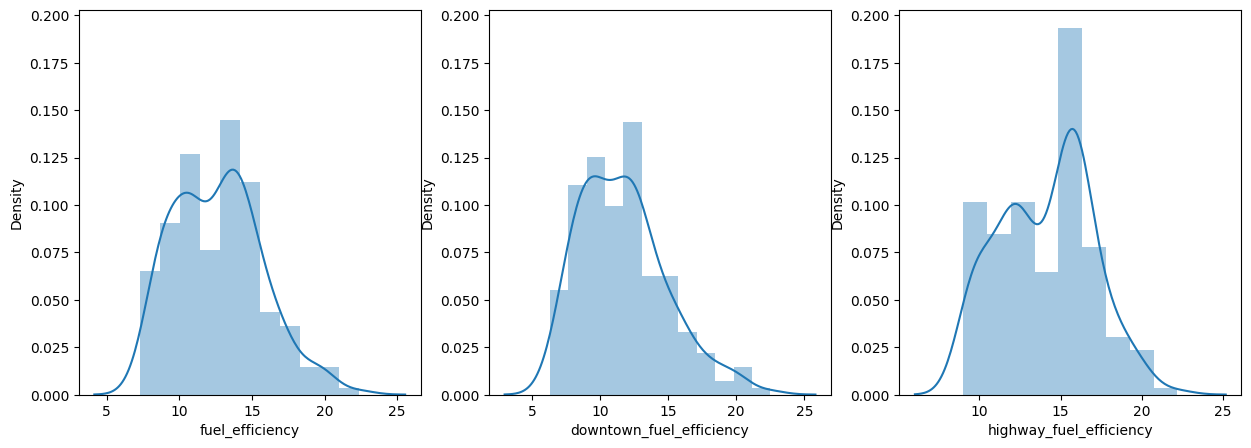

In [39]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.distplot(df_dataset['fuel_efficiency'])
plt.subplot(1, 3, 2)
sns.distplot(df_dataset['downtown_fuel_efficiency'])
plt.subplot(1, 3, 3)
sns.distplot(df_dataset['highway_fuel_efficiency'])

y_min = min([ax.get_ylim()[0] for ax in plt.gcf().get_axes()])
y_max = max([ax.get_ylim()[1] for ax in plt.gcf().get_axes()])

for ax in plt.gcf().get_axes():
    ax.set_ylim([y_min, y_max])
plt.show()

- 표준 연비와 도심 연비의 분포가 유사하지만, 고속도로에서의 연비 분포와는 다름

도심 연비와 고속도로 연비의 합을 평균낸 것이 표준연비인지 확인

<ipython-input-40-d146744dc1ca>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_dataset['fuel_efficiency'])
<ipython-input-40-d146744dc1ca>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_dataset['average_fuel_efficiency'])


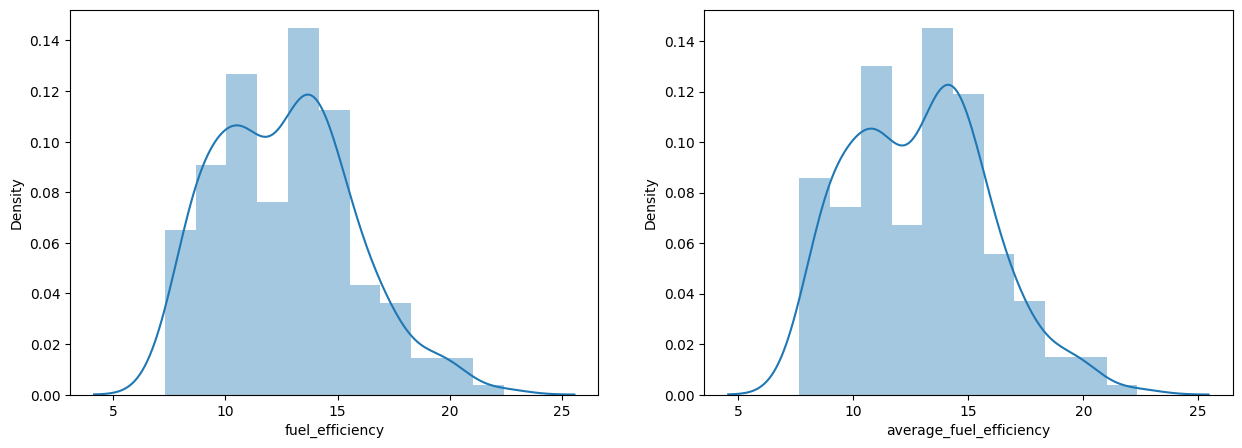

In [40]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(df_dataset['fuel_efficiency'])

df_dataset['average_fuel_efficiency'] = (df_dataset['downtown_fuel_efficiency'] + df_dataset['highway_fuel_efficiency']) / 2
plt.subplot(1, 2, 2)
sns.distplot(df_dataset['average_fuel_efficiency'])
plt.show()

- 히스토그램을 봤을 때, 동일하지 않으므로 각 다른 데이터로 추측

### 각 연비와 에너지 효율 등급간의 관계 분석

In [43]:
print(df_dataset.shape)
print(df_dataset_test.shape)

(201, 11)
(51, 9)


        Ridge     Lasso  ElasticNet
MSE  0.087924  1.508665    0.896271
MAE  0.237963  1.053471    0.820004
R2   0.954495  0.219192    0.536136


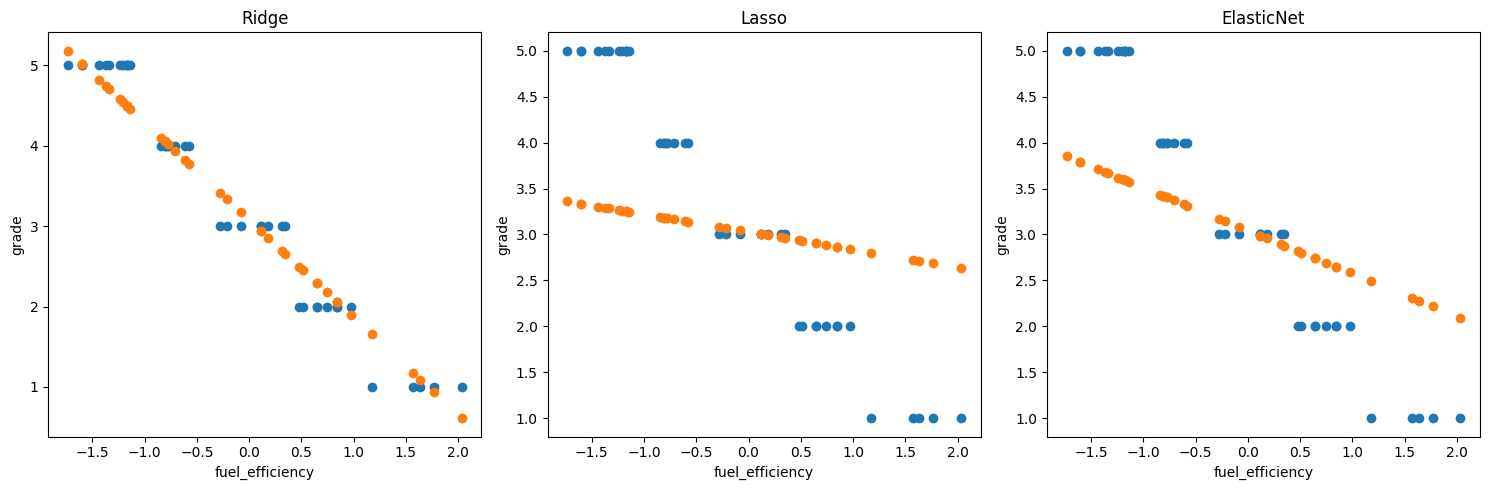

        Ridge     Lasso  ElasticNet
MSE  0.149601  1.573830    0.959265
MAE  0.299873  1.076700    0.845863
R2   0.922574  0.185465    0.503533


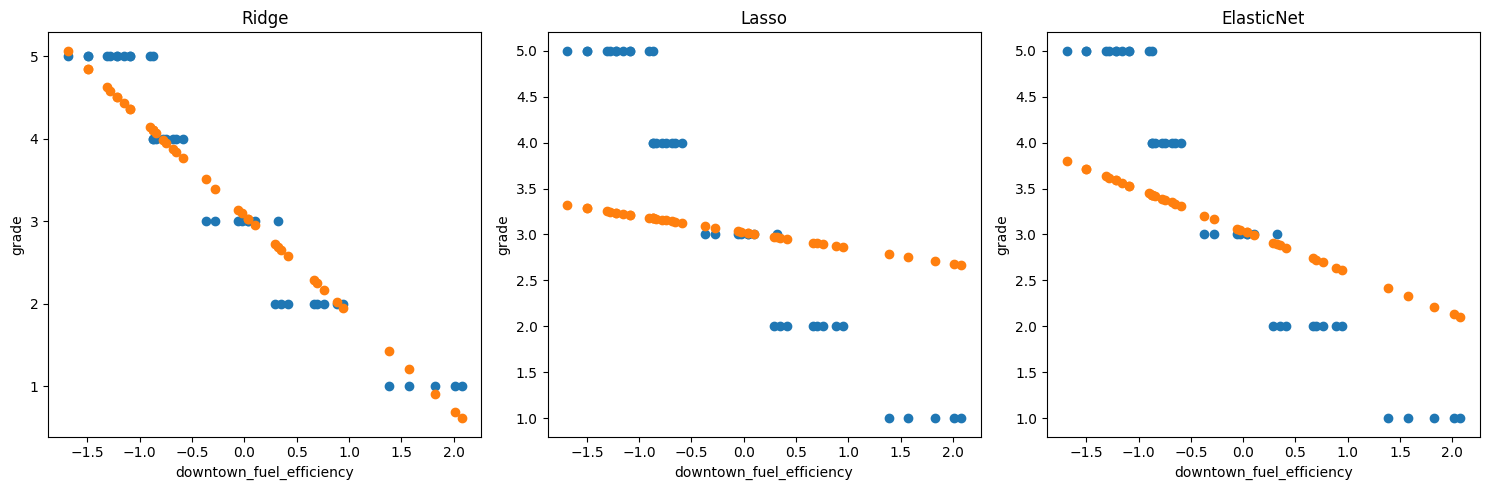

        Ridge     Lasso  ElasticNet
MSE  0.137479  1.554105    0.917940
MAE  0.265760  1.071556    0.836767
R2   0.928848  0.195674    0.524921


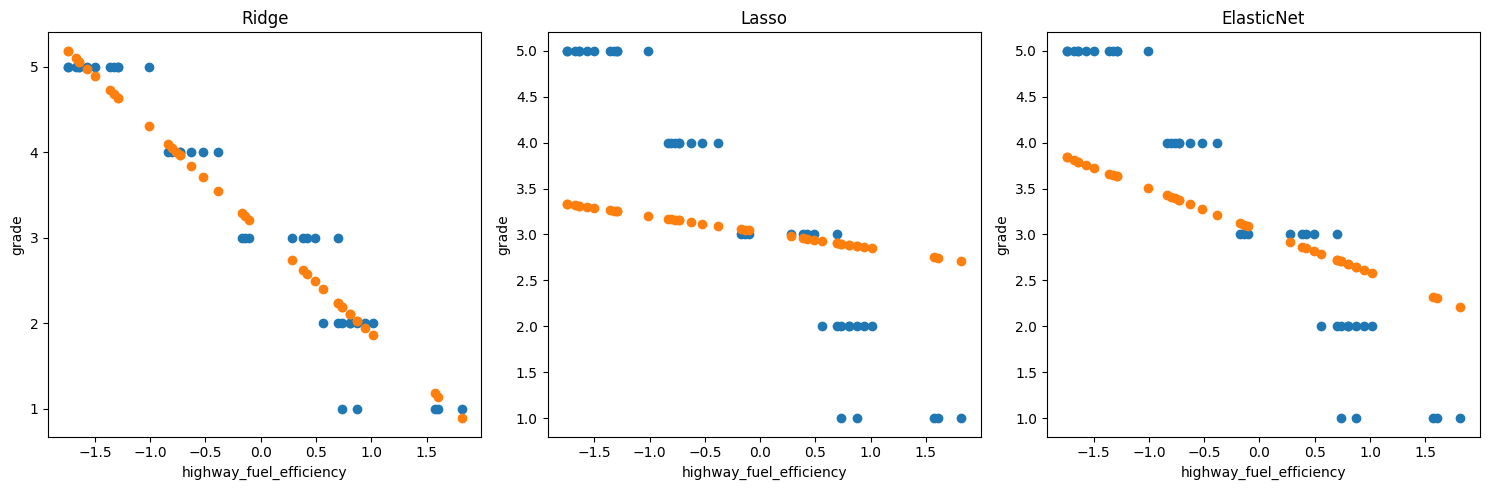

In [42]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 각 연비별
for col in ['fuel_efficiency', 'downtown_fuel_efficiency', 'highway_fuel_efficiency']:
    scaler = StandardScaler()
    df_dataset[col] = scaler.fit_transform(df_dataset[[col]])
    df_dataset_test[col] = scaler.transform(df_dataset_test[[col]])
    # 타겟 데이터, 훈련 데이터 분할
    X_train = df_dataset.loc[:, [col]]
    y_train = df_dataset.loc[:, 'grade']
    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                        test_size=0.2,
                                                        random_state=11)
    # 모델 생성 (Ridge, Lasso, ElasticNet)
    # 모델 훈련 및 예측
    models = {
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet()
    }

    predictions = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions[name] = model.predict(X_test)

    # 정량적 평가
    metrics = {'MSE': mean_squared_error, 'MAE': mean_absolute_error, 'R2': r2_score}
    results = {name: {} for name in models.keys()}

    for name, pred in predictions.items():
        for metric_name, metric in metrics.items():
            results[name][metric_name] = metric(y_test, pred)
    # 결과 출력
    results_df = pd.DataFrame(results)
    print(results_df)
    # 예측값 시각화
    plt.figure(figsize=(15, 5))

    for i, (name, pred) in enumerate(predictions.items(), 1):
      plt.subplot(1, 3, i)
      plt.plot(X_test, y_test, 'o')
      plt.plot(X_test, pred, 'o')
      plt.xlabel(col)
      plt.ylabel('grade')
      plt.title(name)

    plt.tight_layout()
    plt.show()